In [84]:
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as ln


Solve the 1D heat equation using FDM for a conductive rod.
Fixed mesh size and time step size. 

Dirichlet boundary conditions: homogeneous constant (zero).

$\frac{\partial u}{\partial t} = \alpha^2\frac{\partial^2 u}{\partial x^2}$

Which we discretize with (at least) forward Euler in time, and second order central difference in space.

Denote index $i$ subscript for steps in space, $\delta$ superscript for steps in time.

$\frac{\partial u}{\partial t} \approx \frac{1}{\Delta t}(u_i ^{(\delta + 1)}- u_i ^{(\delta)})$ is the forward difference in time.

$\frac{\partial^2 u}{\partial x^2} \approx \frac{1}{h^2}(u_{i+1} ^{(\delta)} + u_{i-1} ^{(\delta)} - 2u_{i+1} ^{(\delta)}))$ is the second order central difference in x.



In [ ]:
L = 10             #length of the rod
p = 101             #no. of interior points + 2 boundary points

h = L/(p-1)        #mesh size
print(L, p, h)

10 101 0.1


In [302]:
T1,T2 = [0,0]     #boundary values at the ends.

#interior initial conditions with one spike.
u0 = np.zeros(p-2)
x = np.linspace(h, L-h, p-2)
u0[int((p-2)/4):int(3*(p-2)/4)] = 5

#non-homogeneous term encoding the boundary conditions:
b = np.zeros(p-2)
b[[0,len(b)-1]] = [T1,T2]

The system can be expressed as matrix multiplication.
du/dt = Ku + b

The matrix form of the one-dimensional Laplacian is the Toeplitz matrix, whose number of elements depends on the size of the grid. 

Here, there are p-2 interior grid points and 2 boundary points, so the dimensions are $(p-2)\times(p-2)$

In [303]:
#set up the system.
#method 1. dense matrix: 
#K = ln.toeplitz(np.append(np.array([-2, 1]),np.zeros(p-4)))


#method 2. sparse matrix:
from scipy import sparse
K = sparse.diags(
    [1,-2,1],
    [-1,0,1],
    shape = (p-2, p-2)
)


kappa  = 0.5
#define the function.
def dudt(t,u):
    return (kappa/(h**2))*(K@u + b)



Now we solve for the time component.

In [304]:
def RK4(func, t_init, t_end, y0, dt):
    
    t = np.arange(t_init, t_end + dt, dt)
        #creating a time-coordinate.
    intv = len(t)

    y0 = np.atleast_1d(y0).astype(float)
    y = np.zeros((len(y0),intv), dtype = float)
        # no. rows is the number of states;
        # no. columns is the time series to be filled.
    y[:,0] = y0 #assigns the initial value of states.
    for i in range(intv - 1):
        k1 = func(t[i],  y[:,i])
        k2 = func(t[i] + dt/2, y[:,i] + dt*k1/2)
        k3 = func(t[i] + dt/2, y[:,i] + dt*k2/2)
        k4 = func(t[i] + dt,   y[:,i] + dt*k3)
        y[:,i+1] = y[:,i] + dt*(k1 + 2*k2 + 2*k3 + k4)/6
    return t, y 


In [307]:
sol = RK4(dudt,0,40,u0,0.01)
timespan = sol[0]
solution = sol[1]
solution.shape #returns (Nx, Nt)

(99, 4001)

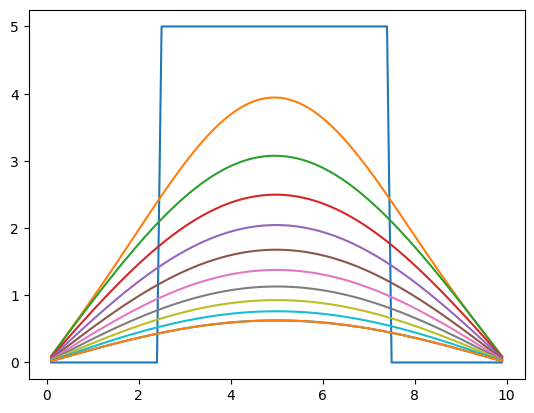

In [308]:
x = np.linspace(h, L-h, p-2)
for i in range(0, int(solution.shape[1]),400):
    plt.plot(x, solution[:,i])
plt.plot(x, solution[:,-1])
